## 📍 Basic 3d density chart

Let's start by making a basic 3d density chart. This step is described in its own blogpost [here](https://www.python-graph-gallery.com/371-surface-plot), so let's just remember how the code looks like:

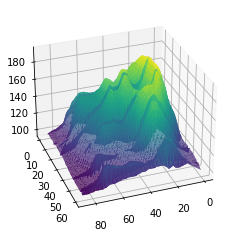

In [2]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
 
# Set the angle of the camera
ax.view_init(30,70)


## 🔄 Rotate the camera

The last line of the code chunck above is of high interest here. It set the angle the camera uses to display the figure (`70°` here).

To produce an animation, we're gonna produce several figure with varying angles, and output them at `.png` format. This is done thanks to a `for` loop:

In [4]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# We are going to do 20 plots, for 20 different angles
for angle in range(70,210,2):
 
    # Turn interactive plotting off
    plt.ioff()

    # Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
    
    # Set the angle of the camera
    ax.view_init(30,angle)
    
    # Save it
    filename='/Users/yan.holtz/Desktop/Volcano_step'+str(angle)+'.png'
    plt.savefig(fname=filename, dpi=96)
    plt.gca()
    plt.close(fig)


Now, you should have a set of 12 images in the specified folder (`/Users/yan.holtz/Desktop/` for me). `Image magick` is a command line tool that allows to concatenate those images in a `gif` file.

## 🎦 Animation

Install ImageMagick with this line of bash:
`brew install imagemagick`

If you don't have `brew` installed, visit the [image magick homepage](https://imagemagick.org/index.php) for explanations.

Once the tool is installed, you can concatenate the 12 images using the following command:

In [ ]:
# Bash
# convert -delay 80 Volcano_step*.png animated_volcano.gif


>Note: the above line of code is written in `bash`, not in `python`. You have to execute it in a terminal, not in your python environment.

And here is the final result ![title](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/graph/animated_volcano.gif)